In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
d = pd.read_csv("Logistic_X_Train.csv")
d1 = pd.read_csv("Logistic_Y_Train.csv")
print(d)

            f1        f2        f3
0    -1.239375  0.749101 -0.528515
1    -1.036070  0.801436 -1.283712
2    -0.615579  1.579521 -1.391927
3     1.335978  1.348651  1.433564
4     0.658925  1.300019  0.571603
...        ...       ...       ...
2995 -0.455628  1.302303 -1.338027
2996 -0.434551  1.597813 -1.748643
2997  0.088277  1.638789 -2.193641
2998  1.525155  0.859234  1.505308
2999 -0.979817  0.563954 -1.539394

[3000 rows x 3 columns]


In [46]:
x = d["f1"].values
Y1 = d["f2"].values
z = d["f3"].values
Y = d1.values

f1 = x.reshape((-1,))
f2 =Y1.reshape((-1,))
f3 = z.reshape((-1,))
y = Y.reshape((-1,))

In [47]:
def hypothesis(f1,f2,f3,theta):
    hx = theta[0] + theta[1]*f1 + theta[2]*f2 + theta[3]*f3;
    return sigmoid(hx)

In [48]:
def sigmoid(s):
    return (1.0/(1.0+np.exp(-1.0*s)))

In [49]:
def error(f1,f2,f3,y,theta):
    e = 0;
    for i in range(f1.shape[0]):
        hx = hypothesis(f1[i],f2[i],f3[i],theta)
        e += y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx)
    return e

In [50]:
def get_grad(f1,f2,f3,y,theta):
    grad = np.zeros((4,))
    for i in range(f1.shape[0]):
        hx = hypothesis(f1[i],f2[i],f3[i],theta)
        grad[0] += (y[i] - hx)
        grad[1] += (y[i] - hx)*f1[i]
        grad[2] += (y[i] - hx)*f2[i]
        grad[3] += (y[i] - hx)*f3[i]
    return grad

In [51]:
def gradient_descent(f1,f2,f3,y,learningRate = 0.001):
    theta = [0.0,0.0,0.0,0.0]
    error_list = []
    itr = 0
    maxItr = 500
    while itr<maxItr:
        grad = get_grad(f1,f2,f3,y,theta)
        hx = hypothesis(f1,f2,f3,theta)
        e = error(f1,f2,f3,y,theta)
        error_list.append(e)
        theta[0] += learningRate*grad[0]
        theta[1] += learningRate*grad[1]
        theta[2] += learningRate*grad[2]
        theta[3] += learningRate*grad[3]
        itr += 1
    return theta,error_list

[-4.517697817542517, -4.144917401798922, 3.330166711591106, -2.3647755658313194]


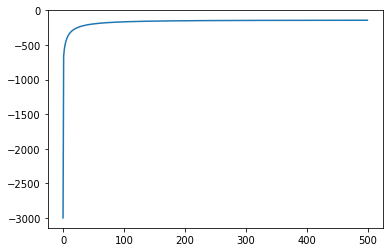

In [52]:
final_theta,error_list = gradient_descent(f1,f2,f3,y)
print(final_theta)
plt.plot(error_list)
plt.show()

In [40]:
def predict(f1,f2,f3,th):
    test_Y = []
    for i in range(f1.shape[0]):
        hx = hypothesis(f1[i],f2[i],f3[i],th)
        l = -1
        if hx >= 0.5:
            l = 1
        elif hx < 0.5:
            l = 0
        test_Y.append(l)
    return test_Y

In [42]:
t = pd.read_csv("Logistic_X_Test.csv")
X = t["f1"].values
Y2 = t["f2"].values
Z = t["f3"].values

f1_test = X.reshape((-1,))
f2_test = Y2.reshape((-1,))
f3_test = Z.reshape((-1,))

prediction = predict(f1_test,f2_test,f3_test,final_theta)
print(prediction)

[1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 